#### Importing libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay, confusion_matrix

#### Loading file

In [2]:
df = pd.read_csv("C:/1. Yuke/Master 1st semester/MBAN6110_Datascience/Group project/dataset_spotify.csv")

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.shape

# There are in total 114000 rows and 21 columns 

(114000, 21)

In [5]:
df.info()

# Noticed that most of the fields do not include NULL values, except for column artists, album_name and track_name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

#### Data Cleaning

In [6]:
df[df['artists'].isnull()]

# Noticed that track_id 1kR4gIb7nGxHPI3D2ifs59 - has artists, album_name and track_name as NULL and some other 
# fields are also populated with 0 values -- not valuable -- we can drop this row 

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [7]:
# dropping the null value - one row 

df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          11

In [8]:
df.info()

# Check for data types -- data types for this dataset should be appropirate 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          11

In [9]:
# Notice that the first column - Unnamed: 0 - is not able to contribute much for the dataset
# Therefore, drop it

df = df.drop(columns=['Unnamed: 0'])

df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           11

In [11]:
# Check if there's any duplicated tracks in the dataset - using the track_id (unique key)

df[df['track_id'].duplicated(keep=False)]

# Notice that there are quite a lot of duplicated tracks with the same ID - require investigation 

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113572,1saXUvvFlAQaefZUFVmhCn,Bethel Music;Paul McClure,We Will Not Be Shaken (Live),Jesus We Love You - Live,53,415079,False,0.253,0.3590,11,-8.482,1,0.0317,0.3100,0.000006,0.3590,0.1150,115.348,3,world-music
113605,1Q5jFp1g2Ns4gBsHRpcqhu,Bethel Music;Jenn Johnson;Michaela Gentile,Simple,In The Ordinary - Spontaneous,50,174971,False,0.490,0.2310,0,-13.968,1,0.0265,0.6070,0.000000,0.0859,0.0904,103.958,4,world-music
113617,71dLJx3qHOTQMTvvoE2dmd,Bethel Music;Amanda Cook,Peace,King of My Heart,48,330840,False,0.515,0.0736,8,-15.492,1,0.0310,0.9750,0.000261,0.0820,0.0684,109.964,4,world-music
113619,6OG5TBCmuTOuWCzSGsETrE,Bethel Music;Brian Johnson;Jenn Johnson,Simple,Simple,48,351236,False,0.624,0.1240,5,-11.191,1,0.0280,0.9170,0.000000,0.1200,0.2060,78.014,4,world-music


In [12]:
# For example, track_id being '5SuOikwiRyPMVoIQDJUgSV' -- have four rows being the identical
# however, the track_genres are different - meaning this song has marked with multiple genres 

df[df['track_id'] == '5SuOikwiRyPMVoIQDJUgSV']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
62102,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,j-pop
99152,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,singer-songwriter
102151,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,songwriter


In [13]:
# Similar with track_id being '4qPNDBW1i3p13qLCt0Ki3A' here: 
df[df['track_id'] == '4qPNDBW1i3p13qLCt0Ki3A']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,0.166,1,-17.235,1,0.0763,0.924,0.000006,0.101,0.267,77.489,4,acoustic
15190,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,0.166,1,-17.235,1,0.0763,0.924,0.000006,0.101,0.267,77.489,4,chill


In [14]:
# concatenated the genres into a single cell separated by comma

df_combined = df.groupby(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']).agg(lambda x: ', '.join(x)).reset_index()

# Display the concatenated dataframe with track_genre being combined

df_combined

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0000vdREvCVMxbQTkS888c,Rill,Lolly,Lolly,44,160725,True,0.910,0.37400,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4,german
1,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,47,322933,False,0.269,0.51600,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4,club
2,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,22,515360,False,0.686,0.56000,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4,minimal-techno
3,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,62,190203,False,0.679,0.77000,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4,hip-hop
4,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,Tief,19,331240,False,0.519,0.43100,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4,minimal-techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90455,7zxHiMmVLt4LGWpOMqOpUh,Haricharan;Gopi Sundar,Bangalore Days,"Aethu Kari Raavilum - From ""Bangalore Days""",56,325156,False,0.766,0.38200,7,-11.464,0,0.0324,0.698000,0.00143,0.1570,0.672,119.992,4,pop-film
90456,7zxpdh3EqMq2JCkOI0EqcG,Piano Genie,Disney Favourites,"Two Worlds (From ""Tarzan"")",23,109573,False,0.529,0.00879,10,-32.266,1,0.0587,0.996000,0.95900,0.0916,0.510,82.694,4,disney
90457,7zyYmIdjqqiX6kLryb7QBx,Eric Chou,學著愛,以後別做朋友,61,260573,False,0.423,0.36000,3,-9.458,1,0.0372,0.728000,0.00000,0.1050,0.291,130.576,4,mandopop
90458,7zybSU9tFO9HNlwmGF7stc,Stereoclip,Echoes,Sunset Drive,54,234300,False,0.649,0.83400,10,-11.430,0,0.0397,0.268000,0.93200,0.0974,0.150,125.004,4,electronic


In [15]:
# Double-check if the genres are combined into one cell 

df_combined[df_combined['track_id'] == '4qPNDBW1i3p13qLCt0Ki3A']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
56117,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,0.166,1,-17.235,1,0.0763,0.924,0.000006,0.101,0.267,77.489,4,"acoustic, chill"


In [16]:
df_combined[df_combined['track_id'] == '5SuOikwiRyPMVoIQDJUgSV']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
63357,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,"acoustic, j-pop, singer-songwriter, songwriter"


In [17]:
# Now, check if there's any duplicated rows after concatenated track_genre column

df_combined[df_combined['track_id'].duplicated(keep=False)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
109,00YwP3wJWiG8IxAA7OS9lo,Anupam Roy,Doorbiney Chokh Rakhbona,Amake Amar Moto Thakte Dao,46,319946,False,0.566,0.419,7,-7.661,1,0.0385,0.771000,0.000000,0.2800,0.186,147.881,4,"singer-songwriter, songwriter"
110,00YwP3wJWiG8IxAA7OS9lo,Anupam Roy,Doorbiney Chokh Rakhbona,Amake Amar Moto Thakte Dao,47,319946,False,0.566,0.419,7,-7.661,1,0.0385,0.771000,0.000000,0.2800,0.186,147.881,4,"indian, indie-pop, indie, k-pop"
189,014SIjoLDG1Ku19c5FlDYh,Creedence Clearwater Revival,Pumpkin Patch Hits,I Put A Spell On You,0,271786,False,0.393,0.732,4,-8.188,0,0.0295,0.004710,0.123000,0.0979,0.621,100.410,4,country
190,014SIjoLDG1Ku19c5FlDYh,Creedence Clearwater Revival,Pumpkin Patch Hits,I Put A Spell On You,3,271786,False,0.393,0.732,4,-8.188,0,0.0295,0.004710,0.123000,0.0979,0.621,100.410,4,rock
495,02jLfqc9gMo8PkHEGHY3OT,Feid,Si Te La Encuentras Por Ahí,Si Te La Encuentras Por Ahí,82,191573,False,0.743,0.576,8,-3.552,0,0.0760,0.151000,0.000059,0.1280,0.455,171.945,4,"reggae, reggaeton"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89945,7x2rua8HcHsaJV5ib1BQbu,Eikichi Yazawa,YOKOHAMA二十才(ハタチ)まえ [50th Anniversary Remastered],あ・い・つ - Remastered 2022,34,258773,False,0.323,0.441,0,-9.504,1,0.0300,0.508000,0.000045,0.0810,0.525,180.169,3,j-rock
89959,7x7i3XBKSM4AoLoPymDuh9,Ghost,Pumpkin Patch Hits,Mary On A Cross,0,244804,False,0.467,0.900,11,-4.505,1,0.0451,0.000187,0.000493,0.1050,0.554,130.027,4,"hard-rock, metal"
89960,7x7i3XBKSM4AoLoPymDuh9,Ghost,Pumpkin Patch Hits,Mary On A Cross,1,244804,False,0.467,0.900,11,-4.505,1,0.0451,0.000187,0.000493,0.1050,0.554,130.027,4,rock
90276,7z1uUb32IxZvJ97Fk86igf,Wisin & Yandel,Última Misión Reggaeton,Pam Pam,0,227280,False,0.874,0.690,10,-6.373,1,0.1140,0.121000,0.000000,0.2490,0.735,95.025,4,"electro, hip-hop, latin, latino"


In [18]:
# These duplicates have different popularity scores and track_genre
# however, other features remain to be the same 

# for example, track_id - 00YwP3wJWiG8IxAA7OS9lo

df_combined[df_combined['track_id'] == '00YwP3wJWiG8IxAA7OS9lo']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
109,00YwP3wJWiG8IxAA7OS9lo,Anupam Roy,Doorbiney Chokh Rakhbona,Amake Amar Moto Thakte Dao,46,319946,False,0.566,0.419,7,-7.661,1,0.0385,0.771,0.0,0.28,0.186,147.881,4,"singer-songwriter, songwriter"
110,00YwP3wJWiG8IxAA7OS9lo,Anupam Roy,Doorbiney Chokh Rakhbona,Amake Amar Moto Thakte Dao,47,319946,False,0.566,0.419,7,-7.661,1,0.0385,0.771,0.0,0.28,0.186,147.881,4,"indian, indie-pop, indie, k-pop"


In [19]:
# for example, track_id - 014SIjoLDG1Ku19c5FlDYh - popularity scores are slightly different, others remained 
# to be the same

df_combined[df_combined['track_id'] == '014SIjoLDG1Ku19c5FlDYh']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
189,014SIjoLDG1Ku19c5FlDYh,Creedence Clearwater Revival,Pumpkin Patch Hits,I Put A Spell On You,0,271786,False,0.393,0.732,4,-8.188,0,0.0295,0.00471,0.123,0.0979,0.621,100.41,4,country
190,014SIjoLDG1Ku19c5FlDYh,Creedence Clearwater Revival,Pumpkin Patch Hits,I Put A Spell On You,3,271786,False,0.393,0.732,4,-8.188,0,0.0295,0.00471,0.123,0.0979,0.621,100.41,4,rock


In [20]:
# Once again, concatenate the track_genre first 

df_combined2 = df_combined.groupby(['track_id', 'artists', 'album_name', 'track_name',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']).agg(lambda x: ', '.join(x)).reset_index()

# Display the concatenated dataframe with track_genre being combined
# Now this dataset doesn't have the popularity column, however the track_genre is fully combined 
# this dataset could be merged to the table with popularity issue solved based on the same track_id 

df_combined2

C:\Users\kryst\AppData\Local\Temp/ipykernel_63644/3457014560.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  df_combined2 = df_combined.groupby(['track_id', 'artists', 'album_name', 'track_name',


,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0000vdREvCVMxbQTkS888c,Rill,Lolly,Lolly,160725,True,0.910,0.37400,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4,german
1,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,322933,False,0.269,0.51600,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4,club
2,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,515360,False,0.686,0.56000,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4,minimal-techno
3,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,190203,False,0.679,0.77000,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4,hip-hop
4,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,Tief,331240,False,0.519,0.43100,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4,minimal-techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,7zxHiMmVLt4LGWpOMqOpUh,Haricharan;Gopi Sundar,Bangalore Days,"Aethu Kari Raavilum - From ""Bangalore Days""",325156,False,0.766,0.38200,7,-11.464,0,0.0324,0.698000,0.00143,0.1570,0.672,119.992,4,pop-film
89736,7zxpdh3EqMq2JCkOI0EqcG,Piano Genie,Disney Favourites,"Two Worlds (From ""Tarzan"")",109573,False,0.529,0.00879,10,-32.266,1,0.0587,0.996000,0.95900,0.0916,0.510,82.694,4,disney
89737,7zyYmIdjqqiX6kLryb7QBx,Eric Chou,學著愛,以後別做朋友,260573,False,0.423,0.36000,3,-9.458,1,0.0372,0.728000,0.00000,0.1050,0.291,130.576,4,mandopop
89738,7zybSU9tFO9HNlwmGF7stc,Stereoclip,Echoes,Sunset Drive,234300,False,0.649,0.83400,10,-11.430,0,0.0397,0.268000,0.93200,0.0974,0.150,125.004,4,electronic


In [21]:
# Check: now only has one row and track_genre is combined 
df_combined2[df_combined2['track_id'] == '014SIjoLDG1Ku19c5FlDYh']

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
188,014SIjoLDG1Ku19c5FlDYh,Creedence Clearwater Revival,Pumpkin Patch Hits,I Put A Spell On You,271786,False,0.393,0.732,4,-8.188,0,0.0295,0.00471,0.123,0.0979,0.621,100.41,4,"country, rock"


In [22]:
# Check: now only has one row and track_genre is combined

df_combined2[df_combined2['track_id'] == '00YwP3wJWiG8IxAA7OS9lo']

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
109,00YwP3wJWiG8IxAA7OS9lo,Anupam Roy,Doorbiney Chokh Rakhbona,Amake Amar Moto Thakte Dao,319946,False,0.566,0.419,7,-7.661,1,0.0385,0.771,0.0,0.28,0.186,147.881,4,"singer-songwriter, songwriter, indian, indie-p..."


In [23]:
# Keep the ones with higher score

idx = df_combined.groupby('track_id')['popularity'].idxmax()

# Use the indices to filter the original DataFrame
df_combined3 = df_combined.loc[idx].reset_index(drop=True)

df_combined3

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0000vdREvCVMxbQTkS888c,Rill,Lolly,Lolly,44,160725,True,0.910,0.37400,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4,german
1,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,47,322933,False,0.269,0.51600,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4,club
2,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,22,515360,False,0.686,0.56000,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4,minimal-techno
3,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,62,190203,False,0.679,0.77000,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4,hip-hop
4,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,Tief,19,331240,False,0.519,0.43100,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4,minimal-techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,7zxHiMmVLt4LGWpOMqOpUh,Haricharan;Gopi Sundar,Bangalore Days,"Aethu Kari Raavilum - From ""Bangalore Days""",56,325156,False,0.766,0.38200,7,-11.464,0,0.0324,0.698000,0.00143,0.1570,0.672,119.992,4,pop-film
89736,7zxpdh3EqMq2JCkOI0EqcG,Piano Genie,Disney Favourites,"Two Worlds (From ""Tarzan"")",23,109573,False,0.529,0.00879,10,-32.266,1,0.0587,0.996000,0.95900,0.0916,0.510,82.694,4,disney
89737,7zyYmIdjqqiX6kLryb7QBx,Eric Chou,學著愛,以後別做朋友,61,260573,False,0.423,0.36000,3,-9.458,1,0.0372,0.728000,0.00000,0.1050,0.291,130.576,4,mandopop
89738,7zybSU9tFO9HNlwmGF7stc,Stereoclip,Echoes,Sunset Drive,54,234300,False,0.649,0.83400,10,-11.430,0,0.0397,0.268000,0.93200,0.0974,0.150,125.004,4,electronic


In [24]:
# Check: has one left with the higher popularity score 

df_combined3[df_combined3['track_id'] == '014SIjoLDG1Ku19c5FlDYh']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
188,014SIjoLDG1Ku19c5FlDYh,Creedence Clearwater Revival,Pumpkin Patch Hits,I Put A Spell On You,3,271786,False,0.393,0.732,4,-8.188,0,0.0295,0.00471,0.123,0.0979,0.621,100.41,4,rock


In [25]:
# Check: has one left with the higher popularity score 

df_combined3[df_combined3['track_id'] == '00YwP3wJWiG8IxAA7OS9lo']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
109,00YwP3wJWiG8IxAA7OS9lo,Anupam Roy,Doorbiney Chokh Rakhbona,Amake Amar Moto Thakte Dao,47,319946,False,0.566,0.419,7,-7.661,1,0.0385,0.771,0.0,0.28,0.186,147.881,4,"indian, indie-pop, indie, k-pop"


In [26]:
# Now, check if the dataset still has any duplicated track_id

df_combined3[df_combined3['track_id'].duplicated(keep=False)]

# No more duplicates in df_combined3 

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [27]:
# Now, drop the track_genre in df_combined3 as the cells under this column do not have complete information

df_combined3 = df_combined3.drop(columns=['track_genre'])

df_combined3

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0000vdREvCVMxbQTkS888c,Rill,Lolly,Lolly,44,160725,True,0.910,0.37400,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4
1,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,47,322933,False,0.269,0.51600,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4
2,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,22,515360,False,0.686,0.56000,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4
3,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,62,190203,False,0.679,0.77000,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4
4,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,Tief,19,331240,False,0.519,0.43100,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,7zxHiMmVLt4LGWpOMqOpUh,Haricharan;Gopi Sundar,Bangalore Days,"Aethu Kari Raavilum - From ""Bangalore Days""",56,325156,False,0.766,0.38200,7,-11.464,0,0.0324,0.698000,0.00143,0.1570,0.672,119.992,4
89736,7zxpdh3EqMq2JCkOI0EqcG,Piano Genie,Disney Favourites,"Two Worlds (From ""Tarzan"")",23,109573,False,0.529,0.00879,10,-32.266,1,0.0587,0.996000,0.95900,0.0916,0.510,82.694,4
89737,7zyYmIdjqqiX6kLryb7QBx,Eric Chou,學著愛,以後別做朋友,61,260573,False,0.423,0.36000,3,-9.458,1,0.0372,0.728000,0.00000,0.1050,0.291,130.576,4
89738,7zybSU9tFO9HNlwmGF7stc,Stereoclip,Echoes,Sunset Drive,54,234300,False,0.649,0.83400,10,-11.430,0,0.0397,0.268000,0.93200,0.0974,0.150,125.004,4


In [28]:
# merging df_combined2 and df_combined3 together on track_id, keeping one row for each track 

df_merged = df_combined3.merge(df_combined2[['track_id', 'track_genre']], on='track_id', how='left')

df_merged

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0000vdREvCVMxbQTkS888c,Rill,Lolly,Lolly,44,160725,True,0.910,0.37400,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4,german
1,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,47,322933,False,0.269,0.51600,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4,club
2,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,22,515360,False,0.686,0.56000,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4,minimal-techno
3,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,62,190203,False,0.679,0.77000,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4,hip-hop
4,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,Tief,19,331240,False,0.519,0.43100,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4,minimal-techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,7zxHiMmVLt4LGWpOMqOpUh,Haricharan;Gopi Sundar,Bangalore Days,"Aethu Kari Raavilum - From ""Bangalore Days""",56,325156,False,0.766,0.38200,7,-11.464,0,0.0324,0.698000,0.00143,0.1570,0.672,119.992,4,pop-film
89736,7zxpdh3EqMq2JCkOI0EqcG,Piano Genie,Disney Favourites,"Two Worlds (From ""Tarzan"")",23,109573,False,0.529,0.00879,10,-32.266,1,0.0587,0.996000,0.95900,0.0916,0.510,82.694,4,disney
89737,7zyYmIdjqqiX6kLryb7QBx,Eric Chou,學著愛,以後別做朋友,61,260573,False,0.423,0.36000,3,-9.458,1,0.0372,0.728000,0.00000,0.1050,0.291,130.576,4,mandopop
89738,7zybSU9tFO9HNlwmGF7stc,Stereoclip,Echoes,Sunset Drive,54,234300,False,0.649,0.83400,10,-11.430,0,0.0397,0.268000,0.93200,0.0974,0.150,125.004,4,electronic


In [29]:
# Check: if the dataset has only kept the higher popularity score and concatenated genres  

df_merged[df_merged['track_id'] == '00YwP3wJWiG8IxAA7OS9lo']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
109,00YwP3wJWiG8IxAA7OS9lo,Anupam Roy,Doorbiney Chokh Rakhbona,Amake Amar Moto Thakte Dao,47,319946,False,0.566,0.419,7,-7.661,1,0.0385,0.771,0.0,0.28,0.186,147.881,4,"singer-songwriter, songwriter, indian, indie-p..."


In [30]:
# Check: if the dataset has only kept the higher popularity score and concatenated genres  

df_merged[df_merged['track_id'] == '014SIjoLDG1Ku19c5FlDYh']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
188,014SIjoLDG1Ku19c5FlDYh,Creedence Clearwater Revival,Pumpkin Patch Hits,I Put A Spell On You,3,271786,False,0.393,0.732,4,-8.188,0,0.0295,0.00471,0.123,0.0979,0.621,100.41,4,"country, rock"


In [31]:
# Check - if the dataset has any other duplicates

df_merged[df_merged['track_id'].duplicated(keep=False)]

# No more duplicates

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [32]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89740 entries, 0 to 89739
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          89740 non-null  object 
 1   artists           89740 non-null  object 
 2   album_name        89740 non-null  object 
 3   track_name        89740 non-null  object 
 4   popularity        89740 non-null  int64  
 5   duration_ms       89740 non-null  int64  
 6   explicit          89740 non-null  bool   
 7   danceability      89740 non-null  float64
 8   energy            89740 non-null  float64
 9   key               89740 non-null  int64  
 10  loudness          89740 non-null  float64
 11  mode              89740 non-null  int64  
 12  speechiness       89740 non-null  float64
 13  acousticness      89740 non-null  float64
 14  instrumentalness  89740 non-null  float64
 15  liveness          89740 non-null  float64
 16  valence           89740 non-null  float6

#### EDA Analysis

In [33]:
df_merged.describe(include = 'all')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,89740,89740,89740,89740,89740.000000,8.974000e+04,89740,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740
unique,89740,31437,46589,73608,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1699
top,0000vdREvCVMxbQTkS888c,George Jones,The Complete Hank Williams,Rockin' Around The Christmas Tree,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tango
freq,1,260,110,48,NaN,NaN,82036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999
mean,NaN,NaN,NaN,NaN,33.207566,2.291444e+05,NaN,0.562166,0.634458,5.283530,-8.498994,0.636973,0.087442,0.328285,0.173415,0.216971,0.469474,122.058134,3.897426,NaN
std,NaN,NaN,NaN,NaN,20.574086,1.129458e+05,NaN,0.176692,0.256606,3.559912,5.221518,0.480875,0.113278,0.338321,0.323849,0.194885,0.262864,30.117651,0.453437,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.586000e+03,NaN,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,19.000000,1.730400e+05,NaN,0.450000,0.457000,2.000000,-10.322250,0.000000,0.036000,0.017100,0.000000,0.098200,0.249000,99.262750,4.000000,NaN
50%,NaN,NaN,NaN,NaN,33.000000,2.132955e+05,NaN,0.576000,0.676000,5.000000,-7.185000,1.000000,0.048900,0.188000,0.000058,0.132000,0.457000,122.013000,4.000000,NaN
75%,NaN,NaN,NaN,NaN,49.000000,2.642930e+05,NaN,0.692000,0.853000,8.000000,-5.108000,1.000000,0.085900,0.625000,0.097625,0.279000,0.682000,140.077000,4.000000,NaN


In [34]:
# Distribution plots for key numerical features
numerical_features = ['popularity', 'duration_ms', 'danceability', 'energy', 
                      'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
                      'liveness', 'valence', 'tempo']

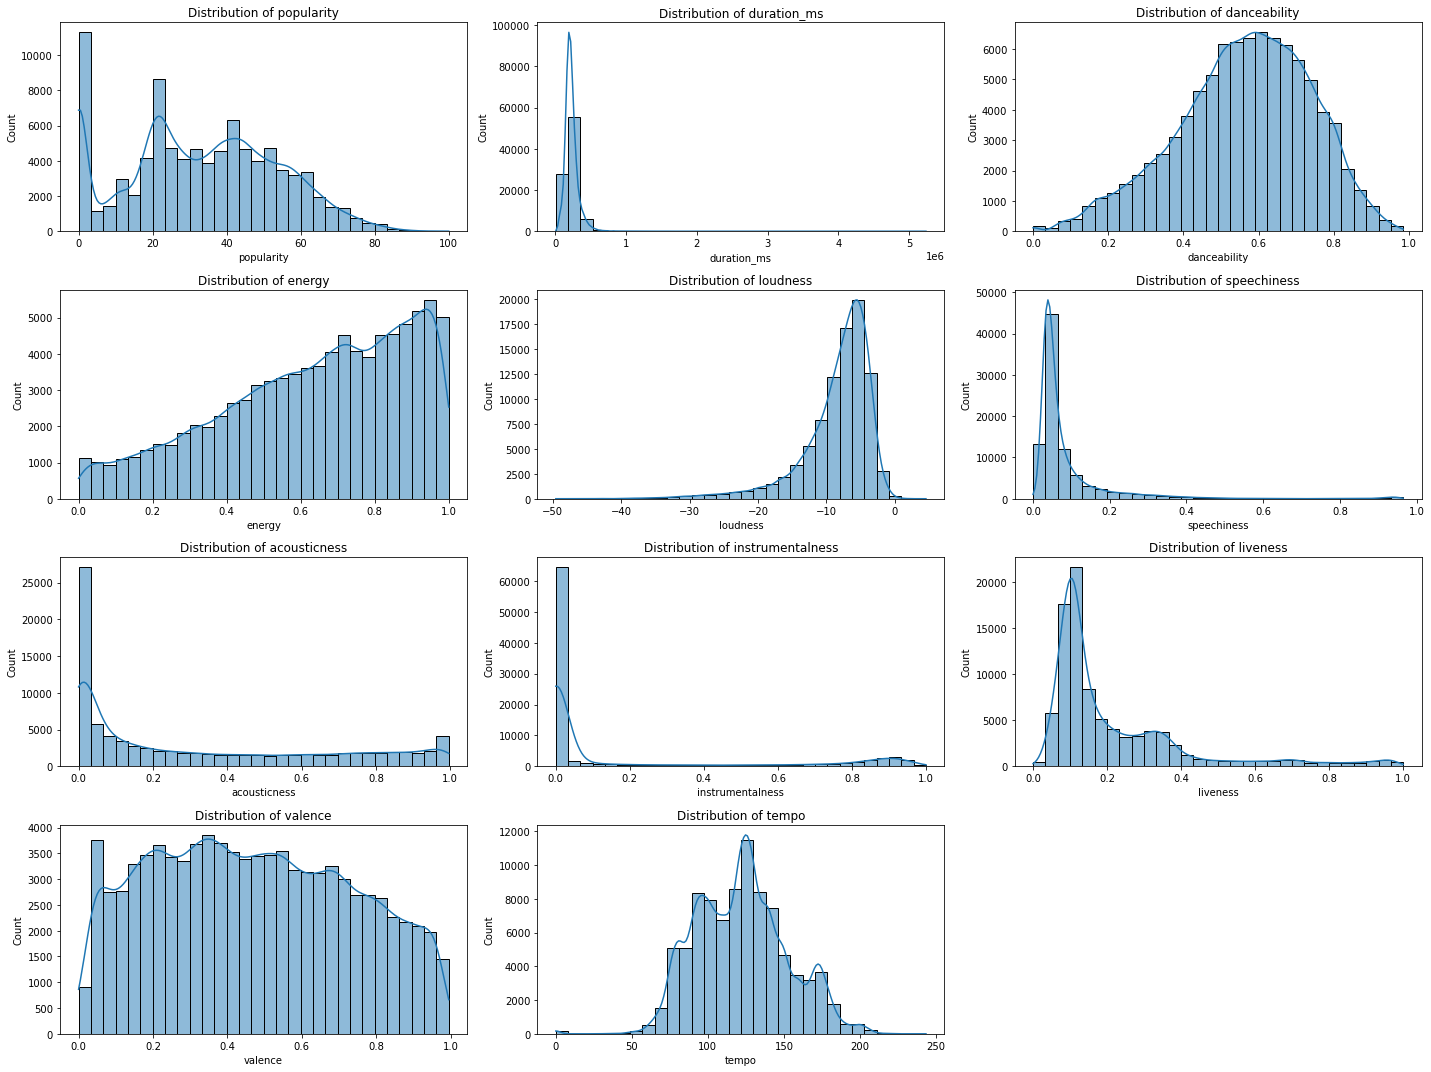

In [35]:
# Plotting distributions of numerical features using histograms 
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(df_merged[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

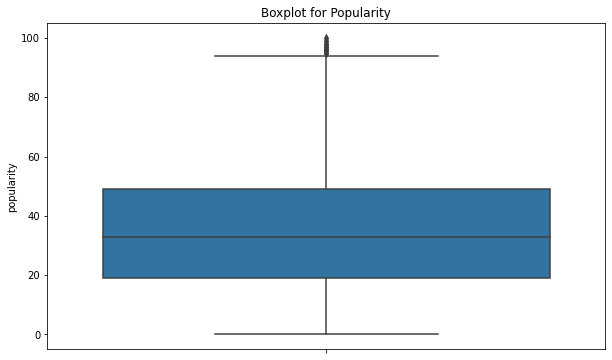

In [36]:
# Boxplot of the column 'popularity' that shows the distribution of the popularity score 

plt.figure(figsize = (10,6))
sns.boxplot(y = df_merged['popularity'])
plt.title('Boxplot for Popularity')
plt.show()

In [41]:
numerical_data = df_merged.select_dtypes(include=['float64', 'int64'])

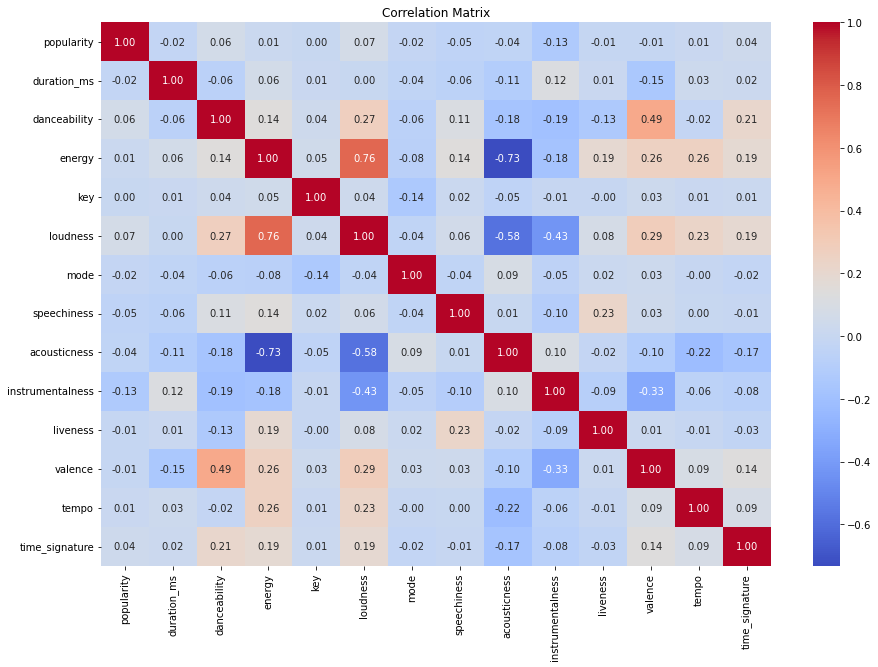

In [42]:
# Correlation analysis using heatmap in pairs
plt.figure(figsize=(15, 10))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

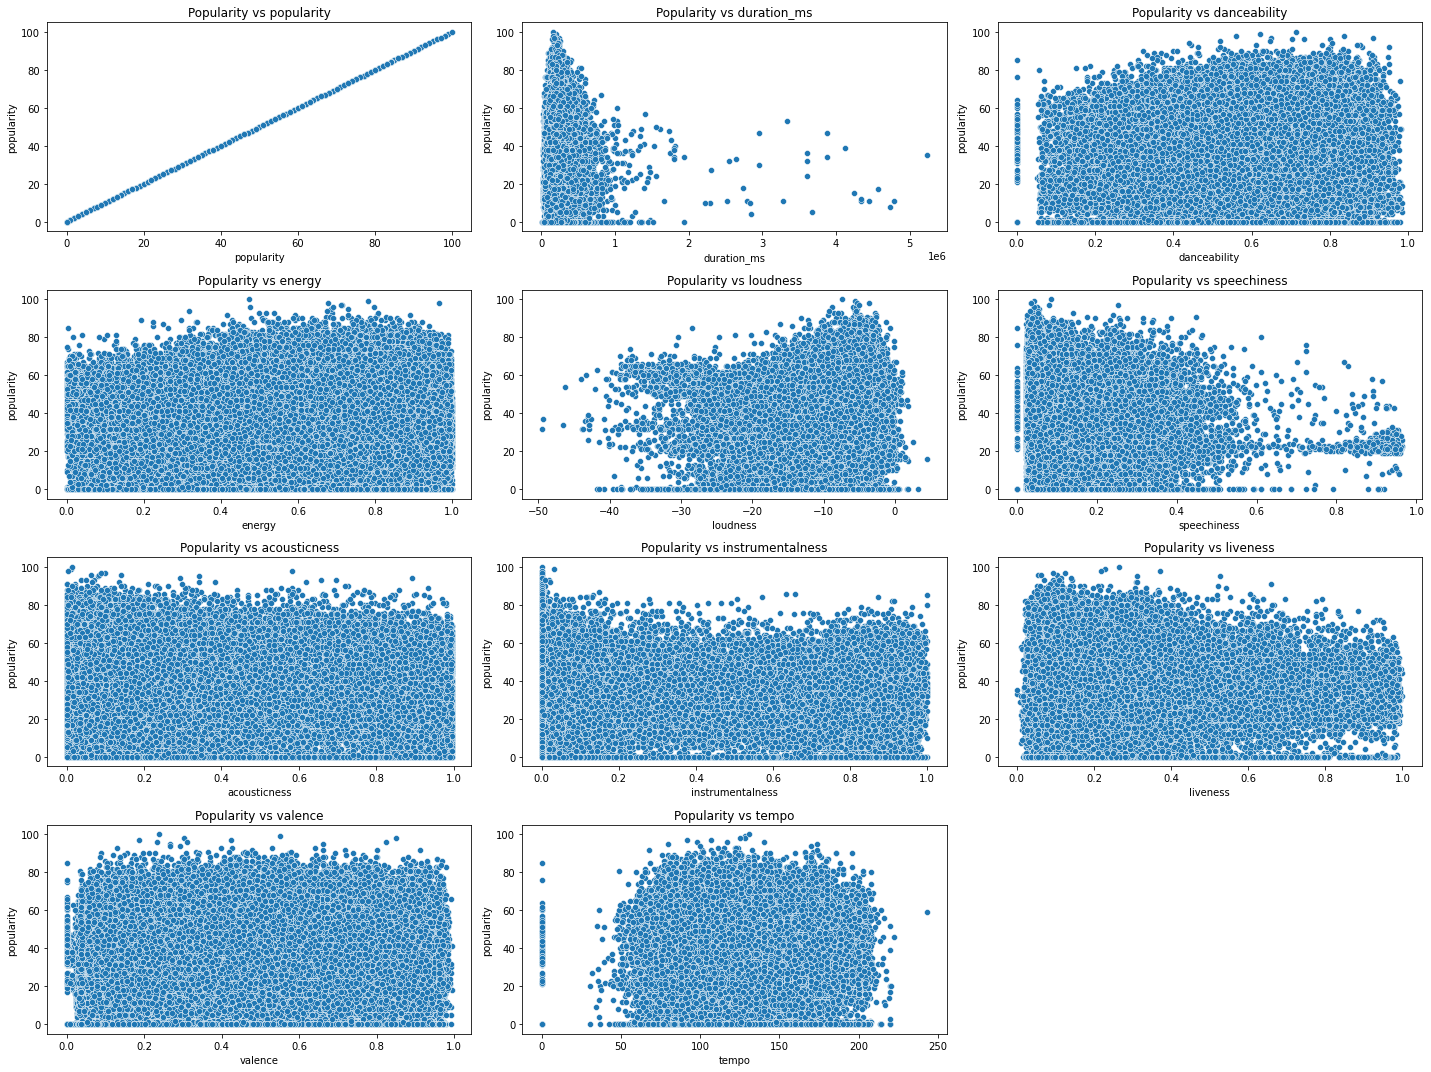

In [43]:
# Popularity analysis of all features using scatter plots 
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(x=df_merged[feature], y=df_merged['popularity'])
    plt.title(f'Popularity vs {feature}')
plt.tight_layout()
plt.show()

In [44]:
# Track genre analysis:
# analysis on the genres that on average have relatively high popularity scores 
# (calculated by their median popularity score)

popularity_genre = df_merged.groupby("track_genre")["popularity"].median()

popularity_genre 

track_genre
acoustic                         47.0
acoustic, blues                  54.0
acoustic, blues, j-pop           47.0
acoustic, blues, j-rock, jazz     0.0
acoustic, british                50.0
                                 ... 
turkish, turkish                 38.0
world-music                      43.0
world-music, alt-rock            60.0
world-music, ambient             54.5
world-music, world-music         34.0
Name: popularity, Length: 1699, dtype: float64

In [45]:
# Look into the genres that have an average popularity score over 60

popularity_genre = popularity_genre.to_frame(name = 'popularity_score').reset_index()

popularity_genre_high = popularity_genre[popularity_genre['popularity_score'] >= 60].sort_values(by = 'popularity_score')

popularity_genre_high


,track_genre,popularity_score
1696,"world-music, alt-rock",60.0
775,"edm, electro, swedish",60.0
744,"dub, dubstep, electronic, progressive-house",60.0
831,"electronic, french",60.0
679,"deep-house, house, progressive-house",60.0
...,...,...
1343,"latino, spanish",89.0
1401,"piano, pop, rock",89.5
1591,"singer-songwriter, songwriter, pop",90.0
1400,"piano, pop, r-n-b, rock, singer-songwriter, so...",90.0


In [46]:
# Find the genres appear the most in the popularity_genre_high 

all_genres = []
for genres in popularity_genre_high['track_genre']:
    all_genres.extend(genres.split(', '))

# Convert the list to a pandas Series
genre_series = pd.Series(all_genres)

# Count the frequency of each genre
genre_counts = genre_series.value_counts()

genre_counts.sort_values(ascending = False).head(10)

# The below list - genres appear the most frequent with popularity scores over 60  

indie          48
metal          47
electro        45
alt-rock       45
indie-pop      44
rock           43
pop            42
house          38
edm            36
alternative    35
dtype: int64

#### Feature Engineering

In [47]:
# One Hot Encoding: Converting data type - from bool to int 

df_merged['explicit'] = df_merged['explicit'].astype(int)

df_merged

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0000vdREvCVMxbQTkS888c,Rill,Lolly,Lolly,44,160725,1,0.910,0.37400,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4,german
1,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,47,322933,0,0.269,0.51600,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4,club
2,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,22,515360,0,0.686,0.56000,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4,minimal-techno
3,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,62,190203,0,0.679,0.77000,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4,hip-hop
4,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,Tief,19,331240,0,0.519,0.43100,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4,minimal-techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,7zxHiMmVLt4LGWpOMqOpUh,Haricharan;Gopi Sundar,Bangalore Days,"Aethu Kari Raavilum - From ""Bangalore Days""",56,325156,0,0.766,0.38200,7,-11.464,0,0.0324,0.698000,0.00143,0.1570,0.672,119.992,4,pop-film
89736,7zxpdh3EqMq2JCkOI0EqcG,Piano Genie,Disney Favourites,"Two Worlds (From ""Tarzan"")",23,109573,0,0.529,0.00879,10,-32.266,1,0.0587,0.996000,0.95900,0.0916,0.510,82.694,4,disney
89737,7zyYmIdjqqiX6kLryb7QBx,Eric Chou,學著愛,以後別做朋友,61,260573,0,0.423,0.36000,3,-9.458,1,0.0372,0.728000,0.00000,0.1050,0.291,130.576,4,mandopop
89738,7zybSU9tFO9HNlwmGF7stc,Stereoclip,Echoes,Sunset Drive,54,234300,0,0.649,0.83400,10,-11.430,0,0.0397,0.268000,0.93200,0.0974,0.150,125.004,4,electronic


In [48]:
df_merged['popularity'].describe()

# median of popularity score - could be used as a threshold to determine if the song is high popular or low popular
# use this as threshold to keep the dataset balanced 

count    89740.000000
mean        33.207566
std         20.574086
min          0.000000
25%         19.000000
50%         33.000000
75%         49.000000
max        100.000000
Name: popularity, dtype: float64

<AxesSubplot:xlabel='popularity', ylabel='Count'>

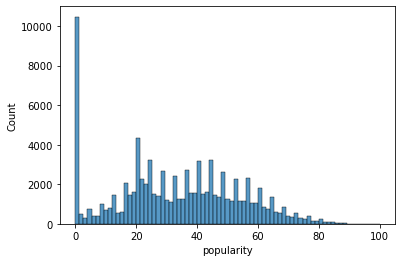

In [49]:
sns.histplot(df_merged, x='popularity')

In [50]:
# Define target variable (popularity) as binary classification 
# Column 'popular' is created to determine if the track is popular or not 

popularity_threshold = df_merged['popularity'].median()
df_merged['popular'] = (df_merged['popularity'] >= popularity_threshold).astype(int)


In [51]:
df_merged.groupby('popular')['track_id'].count()

# with the new column created -- gives a balanced dataset 

popular
0    43954
1    45786
Name: track_id, dtype: int64

In [52]:
# Drop non-numeric and unnecessary columns
features = df_merged.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'popular'])

# Ensure all categorical columns contain uniformly strings or numbers
for col in features.select_dtypes(include=['object']).columns:
    features[col] = features[col].astype(str)

target = df_merged['popular']

# Define categorical and numeric columns
numeric_columns = features.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = features.select_dtypes(include=['object']).columns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Fit the OneHotEncoder separately to extract feature names later
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train[categorical_columns])

OneHotEncoder(handle_unknown='ignore')

### Model Building

##### Random Forest Model

In [53]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

Metrics & graphs used to evaluate Random Forest Model

In [54]:
# Initialize Random Forest model
ranfor = RandomForestClassifier()  

# Create pipeline for Random Forest model
ranfor_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', ranfor)])

# Perform cross-validation and evaluate model
ranfor_scores = cross_val_score(ranfor_pipeline, X_train, y_train, scoring='f1', cv=5)

# Print the mean F1 score
print(f'Random Forest mean F1 score: {np.mean(ranfor_scores)}')

# Fit the Logistic Regression model on the training data
ranfor_pipeline.fit(X_train, y_train)

# Make predictions on the test data
ranfor_pred = ranfor_pipeline.predict(X_test)

# Evaluate the model
ranfor_f1 = f1_score(y_test, ranfor_pred)
ranfor_accuracy = accuracy_score(y_test, ranfor_pred)
ranfor_precision = precision_score(y_test, ranfor_pred)
ranfor_recall = recall_score(y_test, ranfor_pred)

print(f'F1 Score: {ranfor_f1}')
print(f'Accuracy: {ranfor_accuracy}')
print(f'Precision: {ranfor_precision}')
print(f'Recall: {ranfor_recall}')

Random Forest mean F1 score: 0.8248498630895063
F1 Score: 0.8292735348903856
Accuracy: 0.8229700616596093
Precision: 0.8243127759578408
Recall: 0.8342943635577339


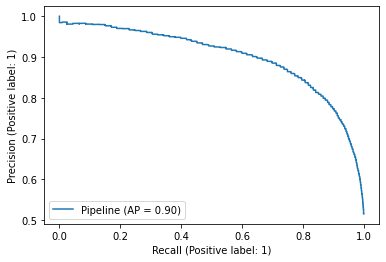

In [55]:
# Precision and Recall curve of Random Forest Model

display = PrecisionRecallDisplay.from_estimator(ranfor_pipeline ,X_test, y_test)

Text(0.5, 15.0, 'Predicted Classes')

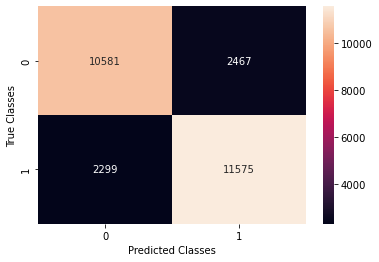

In [56]:
# Confusion Matrix for Random Forest Model 

conf_matrix_ranfor = confusion_matrix(y_test, ranfor_pred)

sns.heatmap(conf_matrix_ranfor, fmt='g', annot = True)
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')

Feature Importance tables: \
 top 10 Non-genre features and Genre features that contribute and influence the accuracy of the model 

In [57]:
# Extract the model coefficients
coefficients = ranfor_pipeline.named_steps['classifier'].feature_importances_

# Get the feature names after preprocessing
onehot_feature_names = encoder.get_feature_names_out(categorical_columns)
feature_names = numeric_columns.tolist() + onehot_feature_names.tolist()

# Create a DataFrame for the coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()

# Filter out track_genre related features
non_genre_features = feature_importance[~feature_importance['Feature'].str.startswith('track_genre')]
genre_features = feature_importance[feature_importance['Feature'].str.startswith('track_genre')]

# Sort the features by their absolute coefficient values
non_genre_features = non_genre_features.sort_values(by='Absolute Coefficient', ascending=False)
genre_features = genre_features.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top non-genre feature and top genre feature
top_non_genre_feature = non_genre_features.iloc[0]
top_genre_feature = genre_features.iloc[0]

# Display the top 10 non-genre features and top 10 genre features
top_10_non_genre_features = non_genre_features.head(10)
top_10_genre_features = genre_features.head(10)

print("Top 10 Non-Genre Features:")
print(top_10_non_genre_features)

print("\nTop 10 Genre Features:")
print(top_10_genre_features)


Top 10 Non-Genre Features:
             Feature  Coefficient  Absolute Coefficient
7       acousticness     0.059569              0.059569
2             energy     0.057525              0.057525
0        duration_ms     0.056086              0.056086
1       danceability     0.055560              0.055560
6        speechiness     0.054777              0.054777
4           loudness     0.054315              0.054315
10           valence     0.053682              0.053682
11             tempo     0.051634              0.051634
9           liveness     0.050526              0.050526
8   instrumentalness     0.048005              0.048005

Top 10 Genre Features:
                         Feature  Coefficient  Absolute Coefficient
1450           track_genre_tango     0.009426              0.009426
1179            track_genre_kids     0.008901              0.008901
260        track_genre_bluegrass     0.008132              0.008132
1057      track_genre_honky-tonk     0.007721              0.

##### Logistics Regression Model

Metrics & graphs used to evaluate Logistics Regression Model

In [58]:
# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Create pipeline for Logistic Regression
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logreg)])

# Perform cross-validation and evaluate model
logreg_scores = cross_val_score(logreg_pipeline, X_train, y_train, scoring='f1', cv=5)

# Print the mean F1 score
print(f'Logistic Regression mean F1 score: {np.mean(logreg_scores)}')

# Fit the Logistic Regression model on the training data
logreg_pipeline.fit(X_train, y_train)

# Make predictions on the test data
logreg_pred = logreg_pipeline.predict(X_test)

# Evaluate the model
logreg_f1 = f1_score(y_test, logreg_pred)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)

print(f'F1 Score: {logreg_f1}')
print(f'Accuracy: {logreg_accuracy}')
print(f'Precision: {logreg_precision}')
print(f'Recall: {logreg_recall}')

Logistic Regression mean F1 score: 0.807037451337403
F1 Score: 0.8134068485200231
Accuracy: 0.8089295000371444
Precision: 0.8187527384255878
Recall: 0.8081303156984287


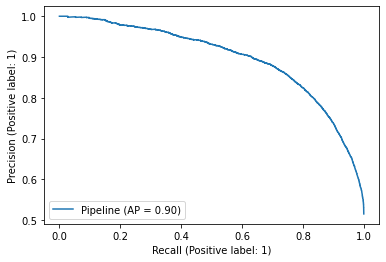

In [59]:
# Precision and Recall curve of Logistics Regression

display = PrecisionRecallDisplay.from_estimator(logreg_pipeline, X_test, y_test)

Text(0.5, 15.0, 'Predicted Classes')

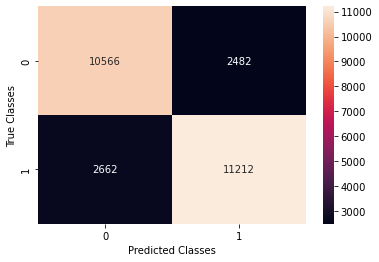

In [60]:
# Confusion Matrix for Logistics Regression

conf_matrix_logreg = confusion_matrix(y_test, logreg_pred)

sns.heatmap(conf_matrix_logreg, fmt='g', annot = True)
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')

Feature Importance tables: \
 top 10 Non-genre features and Genre features that contribute and influence the accuracy of the model 

In [61]:
# Extract the model coefficients
coefficients = logreg_pipeline.named_steps['classifier'].coef_[0]

# Get the feature names after preprocessing
onehot_feature_names = encoder.get_feature_names_out(categorical_columns)
feature_names = numeric_columns.tolist() + onehot_feature_names.tolist()

# Create a DataFrame for the coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()

# Filter out track_genre related features
non_genre_features = feature_importance[~feature_importance['Feature'].str.startswith('track_genre')]
genre_features = feature_importance[feature_importance['Feature'].str.startswith('track_genre')]

# Sort the features by their absolute coefficient values
non_genre_features = non_genre_features.sort_values(by='Absolute Coefficient', ascending=False)
genre_features = genre_features.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top non-genre feature and top genre feature
top_non_genre_feature = non_genre_features.iloc[0]
top_genre_feature = genre_features.iloc[0]

# Display the top 10 non-genre features and top 10 genre features
top_10_non_genre_features = non_genre_features.head(10)
top_10_genre_features = genre_features.head(10)

print("Top 10 Non-Genre Features:")
print(top_10_non_genre_features)

print("\nTop 10 Genre Features:")
print(top_10_genre_features)

Top 10 Non-Genre Features:
             Feature  Coefficient  Absolute Coefficient
4           loudness     1.550776              1.550776
6        speechiness    -1.126755              1.126755
1       danceability     1.013087              1.013087
2             energy    -0.648846              0.648846
10           valence    -0.558186              0.558186
9           liveness    -0.304403              0.304403
0        duration_ms    -0.296528              0.296528
12    time_signature     0.249818              0.249818
11             tempo     0.222013              0.222013
8   instrumentalness    -0.138077              0.138077

Top 10 Genre Features:
                         Feature  Coefficient  Absolute Coefficient
1110         track_genre_iranian    -5.034124              5.034124
1370         track_genre_romance    -5.015032              5.015032
833            track_genre_forro     4.479113              4.479113
1388       track_genre_sertanejo     4.427525              4.

##### Naive Bayes Model

Metrics used to evaluate the Naive Bayes Model

In [62]:
# Add a step to convert sparse matrix to dense
from scipy.sparse import csr_matrix

class DenseTransformer:
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if isinstance(X, csr_matrix):
            return X.toarray()
        else:
            return X

# Initialize Gaussian Naive Bayes

nb = GaussianNB()

nb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),  ('to_dense', DenseTransformer()), ('classifier', nb)])

nb_scores = cross_val_score(nb_pipeline, X_train, y_train, scoring='f1_weighted', cv=5)

print(f'Gaussian Naive Bayes mean F1 score: {np.mean(nb_scores)}')

# Fit the Naive Bayes model on the training data
nb_pipeline.fit(X_train, y_train)

# Make predictions on the test data
nb_pred = nb_pipeline.predict(X_test)

# Evaluate the model
nb_f1 = f1_score(y_test, nb_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)

print(f'F1 Score: {nb_f1}')
print(f'Accuracy: {nb_accuracy}')
print(f'Precision: {nb_precision}')
print(f'Recall: {nb_recall}')

Gaussian Naive Bayes mean F1 score: 0.5332177908592366
F1 Score: 0.3411939411939412
Accuracy: 0.58803209271228
Precision: 0.9699425869638636
Recall: 0.20700591033588006


In [ ]:
# A summary of the mean f1 scores of all three models with a five-fold cross validations: 

ranfor_scores = cross_val_score(ranfor_pipeline, X_train, y_train, scoring='f1', cv=5)
logreg_scores = cross_val_score(logreg_pipeline, X_train, y_train, scoring='f1', cv=5)
nb_scores = cross_val_score(nb_pipeline, X_train, y_train, scoring='f1_weighted', cv=5)

print(f"RandomForest mean score: {np.mean(ranfor_scores)}")
print(f"LogisticRegression mean score: {np.mean(logreg_scores)}")
print(f"GaussianNB mean score: {np.mean(nb_scores)}")
